In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

os.environ['CLMM_MODELING_BACKEND'] = 'nc' 

import clmm
from clmm import Cosmology

In [3]:
clmm.__version__

'1.1.8'

In [4]:
cosmo = Cosmology(H0=70.0, Omega_dm0=0.27-0.045, Omega_b0=0.045, Omega_k0=0.0)


In [5]:
from clmm.theory import ccl
cosmoccl =  clmm.cosmology.ccl.CCLCosmology(H0=70.0, Omega_dm0=0.27-0.045, Omega_b0=0.045, Omega_k0=0.0)
moo = ccl.CCLCLMModeling(massdef='mean', delta_mdef=200, halo_profile_model='nfw', )

moo.set_cosmo(cosmoccl)
moo.set_concentration(4)
moo.set_mass(1.e15)

z_cl = 1.

#source properties
z_source = 2. #all sources in the same plane
z_distrib_func = clmm.utils._chang_z_distrib #sources redshift following a distribution
alpha = [2, -0.5]  

In [6]:
r3d = np.logspace(-3,1, 1000)
rho = moo.eval_3d_density(r3d, z_cl)
Sigma = moo.eval_surface_density(r3d, z_cl)
DeltaSigma = moo.eval_excess_surface_density(r3d, z_cl)
Sigmac = moo.eval_critical_surface_density(z_cl, z_source)


gammat = moo.eval_tangential_shear(r3d, z_cl, z_source)
kappa = moo.eval_convergence(r3d, z_cl, z_source)
gt = moo.eval_reduced_tangential_shear(r3d, z_cl, z_source)
mu = moo.eval_magnification(r3d, z_cl, z_source)
mu_bias = moo.eval_magnification_bias(r3d, z_cl, z_source, alpha)


aqui


/global/homes/e/edujb/.conda/envs/numcosmo/lib/python3.9/site-packages/clmm-1.1.8-py3.9.egg/clmm/theory/generic.py:67: UserWarning: Magnification is negative for certain radii,                     returning nan for magnification bias in this case.
/global/homes/e/edujb/.conda/envs/numcosmo/lib/python3.9/site-packages/clmm-1.1.8-py3.9.egg/clmm/theory/generic.py:69: RuntimeWarning: invalid value encountered in power


In [7]:
moo2 = clmm.Modeling(massdef='mean', delta_mdef=200, halo_profile_model='nfw')

moo2.set_cosmo(cosmo)
moo2.set_concentration(4)
moo2.set_mass(1.e15)

z_cl = 1.

#source properties
z_source2 = 2 #all sources in the same plane
z_distrib_func2 = clmm.utils._chang_z_distrib #sources redshift following a distribution
alpha2 = [2, -0.5] 

In [8]:
r3d_nc = np.logspace(-3, 1, 1000)
rho_nc = moo2.eval_3d_density(r3d_nc, z_cl)
Sigma_nc = moo2.eval_surface_density(r3d_nc, z_cl)
DeltaSigma_nc = moo2.eval_excess_surface_density(r3d_nc, z_cl)
Sigmac_nc = moo2.eval_critical_surface_density(z_cl, z_source2)


gammat_nc = moo2.eval_tangential_shear(r3d_nc, z_cl, z_source2)
kappa_nc = moo2.eval_convergence(r3d_nc, z_cl, z_source2)
gt_nc = moo2.eval_reduced_tangential_shear(r3d_nc, z_cl, z_source2)
mu_nc = moo2.eval_magnification(r3d_nc, z_cl, z_source2)
mu_bias_nc = moo2.eval_magnification_bias(r3d_nc, z_cl, z_source2, alpha2)

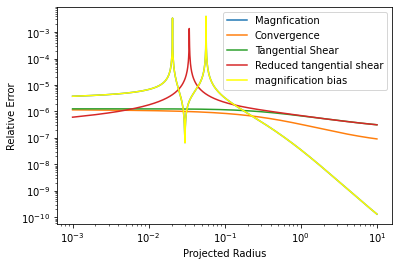

In [9]:
#NC results
mu_dif = []
kappa_dif = []
gt_dif = []
mb_dif = []

plt.plot(r3d, abs(mu/mu_nc - 1), '-', label = 'Magnfication')
plt.plot(r3d, abs(kappa/kappa_nc -1), '-', label = 'Convergence')
plt.plot(r3d, abs(gammat/gammat_nc -1), '-', label = 'Tangential Shear')
plt.plot(r3d, abs(gt/gt_nc -1), '-', label = 'Reduced tangential shear')
plt.plot(r3d, abs(mu_bias[0]/mu_bias_nc[0] -1), '-', color='yellow', label = 'magnification bias')
plt.xscale('log')
plt.xlabel('Projected Radius')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()
plt.show()


In [12]:
#Indexes gives me the values where the magnification is negative, which returns nan for the magnification bias
indexes = np.where(mu < 0)
a = indexes[0][0]
b = indexes[0][-1]
r_negative = r3d[a:b]
mu_bias_nan = mu_bias[0][a:b]
print(r_negative, mu_bias_nan)

[0.02057374 0.0207643  0.02095662 0.02115073 0.02134663 0.02154435
 0.02174389 0.02194529 0.02214855 0.0223537  0.02256074 0.0227697
 0.0229806  0.02319345 0.02340827 0.02362508 0.0238439  0.02406475
 0.02428764 0.0245126  0.02473964 0.02496878 0.02520005 0.02543346
 0.02566903 0.02590678 0.02614673 0.02638891 0.02663333 0.02688001
 0.02712898 0.02738025 0.02763385 0.0278898  0.02814812 0.02840884
 0.02867196 0.02893753 0.02920556 0.02947606 0.02974908 0.03002462
 0.03030271 0.03058338 0.03086665 0.03115254 0.03144108 0.0317323
 0.03202621 0.03232284 0.03262222 0.03292437 0.03322933 0.0335371
 0.03384773 0.03416123 0.03447764 0.03479698 0.03511928 0.03544456
 0.03577285 0.03610419 0.03643859 0.03677609 0.03711672 0.0374605
 0.03780747 0.03815765 0.03851107 0.03886777 0.03922777 0.0395911
 0.0399578  0.0403279  0.04070142 0.04107841 0.04145888 0.04184289
 0.04223044 0.04262159 0.04301636 0.04341478 0.0438169  0.04422274
 0.04463234 0.04504573 0.04546295 0.04588404 0.04630903 0.04673795
